# Titanic Survival Prediction 

### Task - Build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python.

!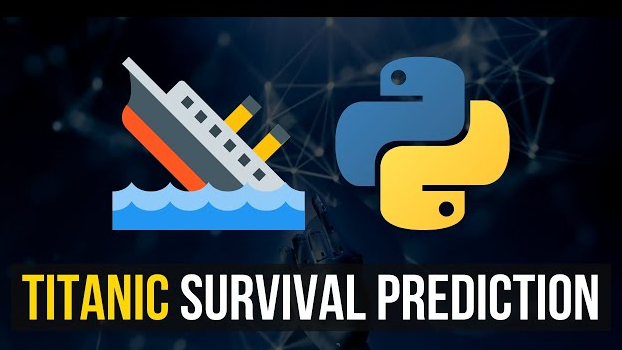

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings

# Set the warning filter to 'ignore'
warnings.filterwarnings('ignore')

In [3]:
# read data set

df = pd.read_csv(r"E:\Projects\Codsoft_Projects\Titanic Survival Prediction Dataset\Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.duplicated().sum()

0

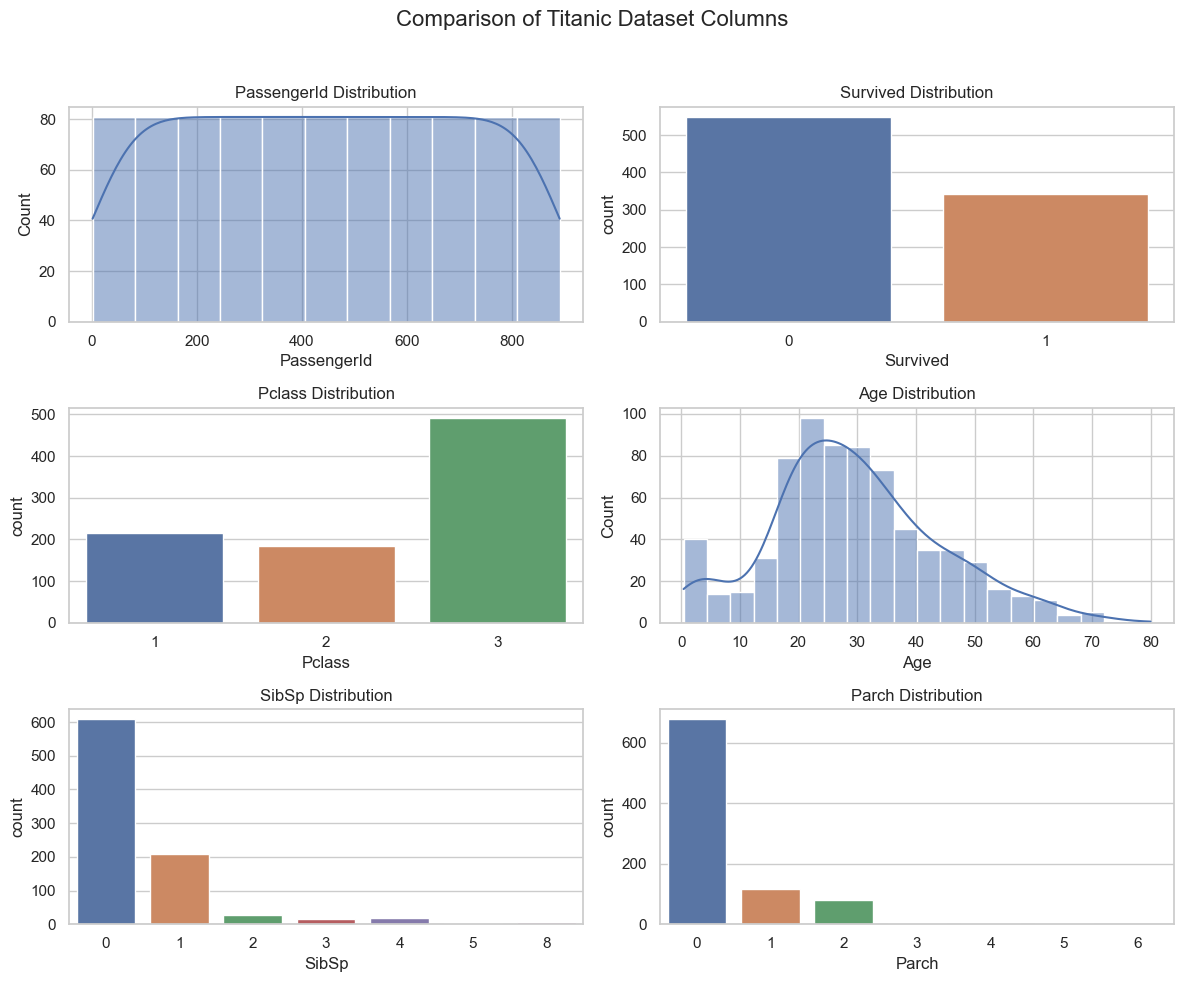

In [10]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Comparison of Titanic Dataset Columns', fontsize=16)

# Visualization for PassengerId
sns.histplot(df['PassengerId'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('PassengerId Distribution')

# Visualization for Survived
sns.countplot(x='Survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Survived Distribution')

# Visualization for Pclass
sns.countplot(x='Pclass', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Pclass Distribution')

# Visualization for Age
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution')

# Visualization for SibSp
sns.countplot(x='SibSp', data=df, ax=axes[2, 0])
axes[2, 0].set_title('SibSp Distribution')

# Visualization for Parch
sns.countplot(x='Parch', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Parch Distribution')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

In [11]:
sex_counts=df['Sex'].value_counts()
sex_counts

male      577
female    314
Name: Sex, dtype: int64

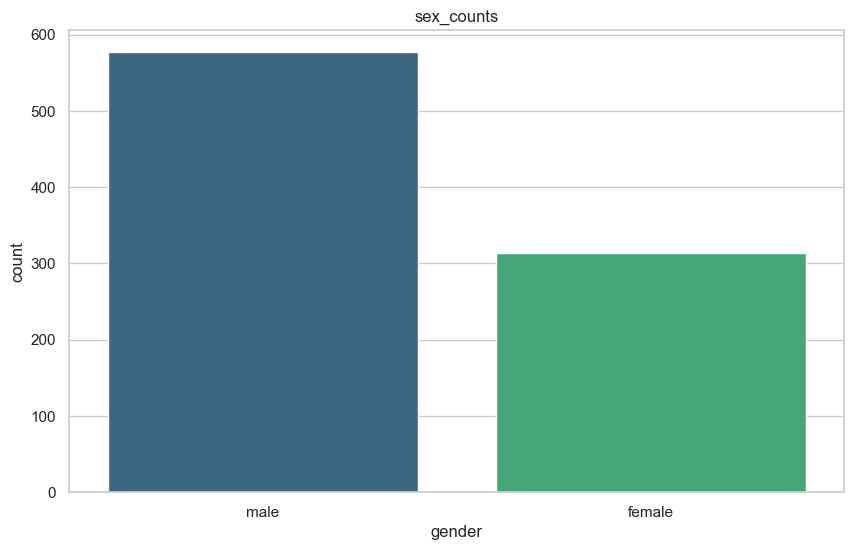

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis')
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

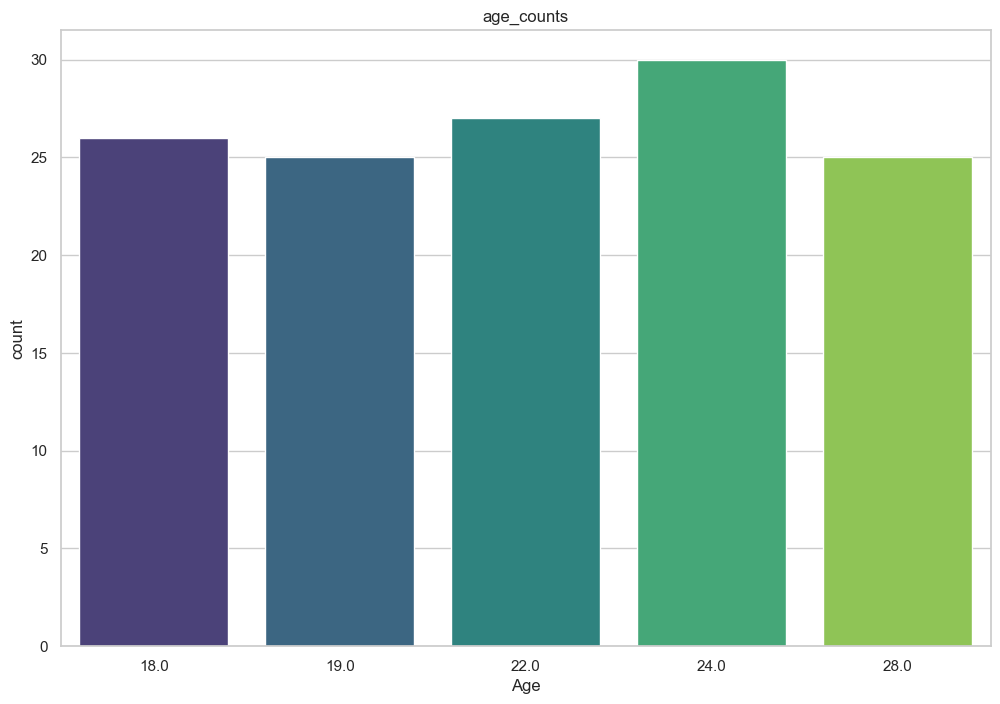

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

In [13]:
#the most 5 age in data
age_counts=df['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

In [14]:
pclass_counts=df['Pclass'].value_counts()
pclass_counts


3    491
1    216
2    184
Name: Pclass, dtype: int64

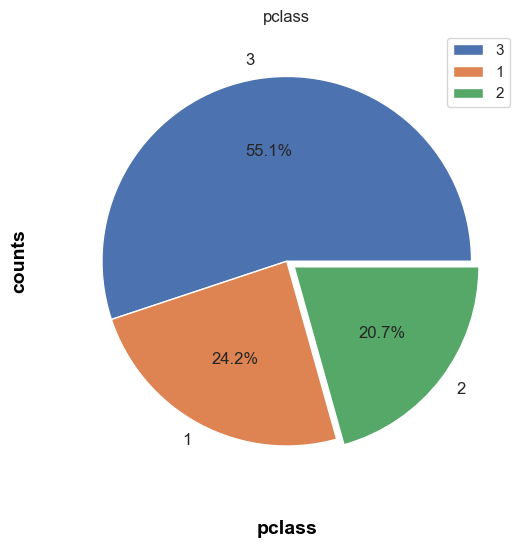

In [15]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()

In [16]:
SibSp_counts=df['SibSp'].value_counts()
SibSp_counts

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

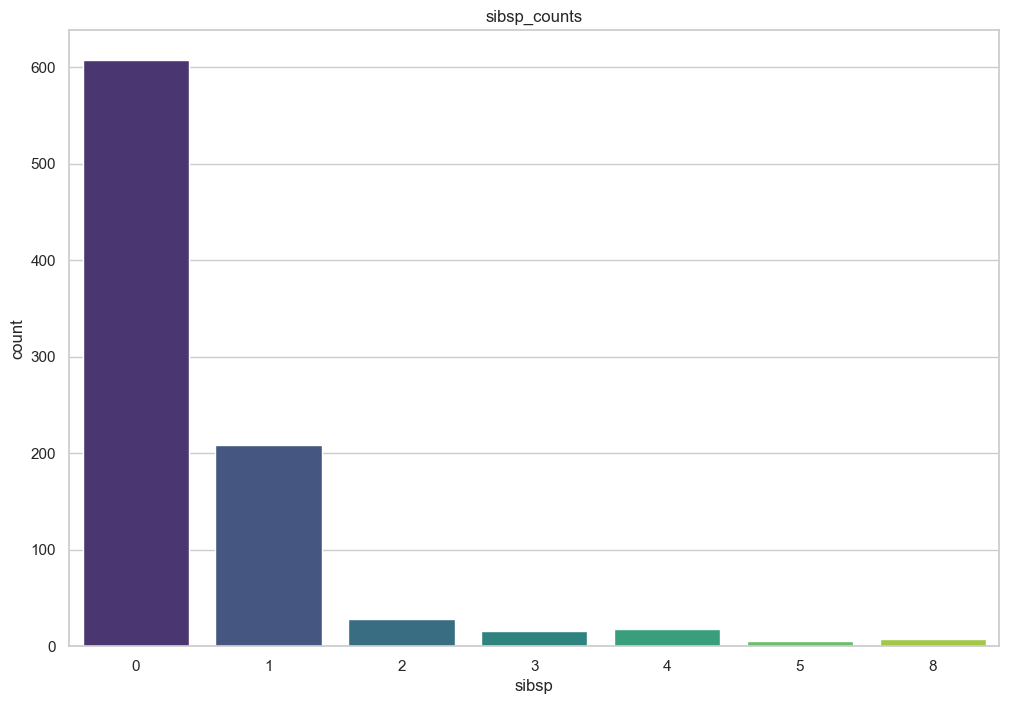

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x=SibSp_counts.index,y=SibSp_counts.values,palette='viridis')
plt.title('sibsp_counts')
plt.xlabel('sibsp')
plt.ylabel('count')
plt.show()

In [18]:
Parch_counts=df['Parch'].value_counts()
Parch_counts

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

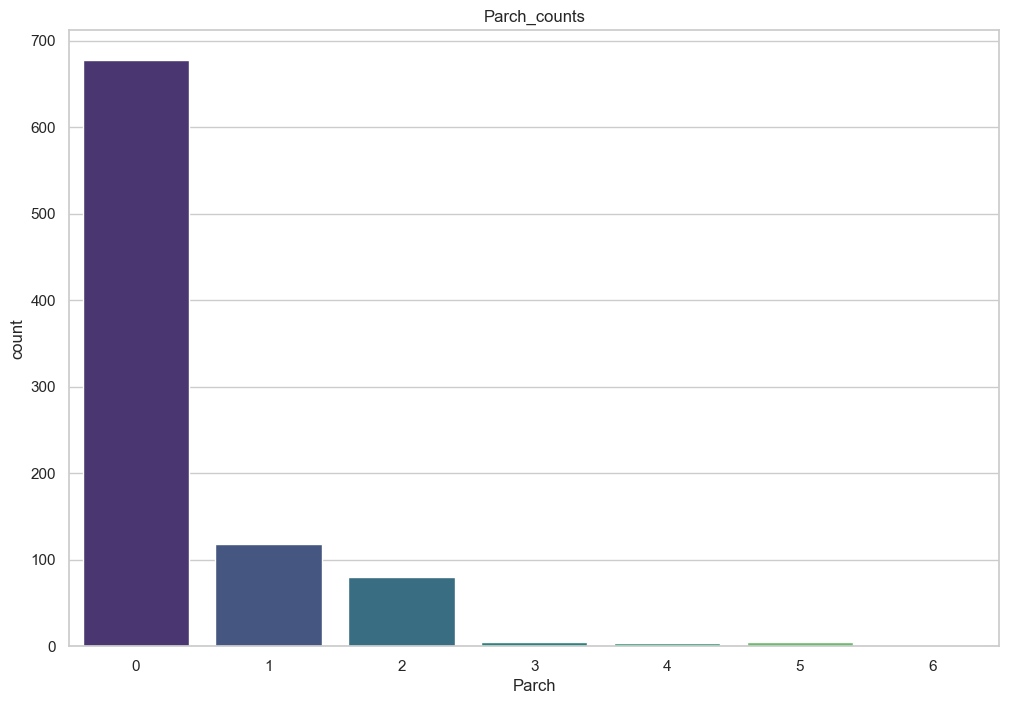

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=Parch_counts.index,y=Parch_counts.values,palette='viridis')
plt.title('Parch_counts')
plt.xlabel('Parch')
plt.ylabel('count')
plt.show()

In [20]:
Embarked_counts=df['Embarked'].value_counts()
Embarked_counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

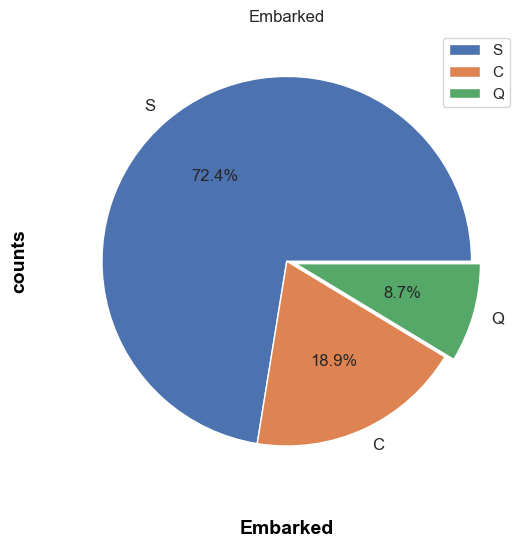

In [21]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
Embarked_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Embarked')
plt.xlabel('Embarked', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Embarked_counts.index, loc = "best")
plt.show()

In [22]:
Survived_counts=df['Survived'].value_counts()
Survived_counts

0    549
1    342
Name: Survived, dtype: int64

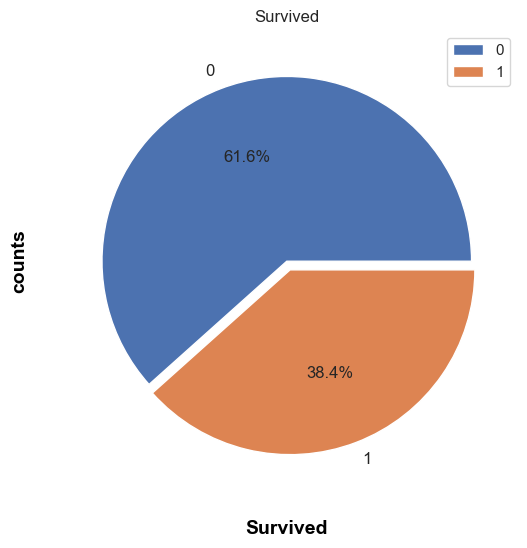

In [23]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

#### visulize ages are survived or not

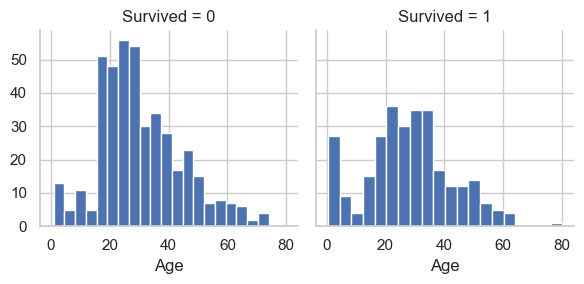

In [24]:
age=sns.FacetGrid(df,col='Survived')
age.map(plt.hist,'Age',bins=20)

#### visulize Gender are survived or not

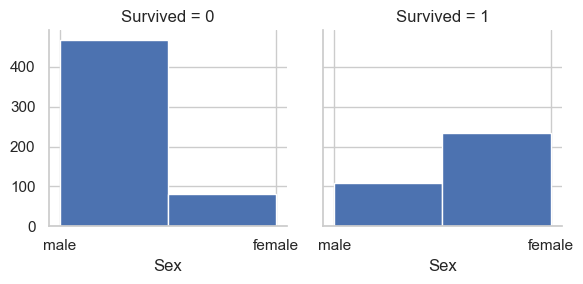

In [25]:
gender=sns.FacetGrid(df,col='Survived')

gender.map(plt.hist,'Sex',bins=2)

#### visulize sibsp is survived or not

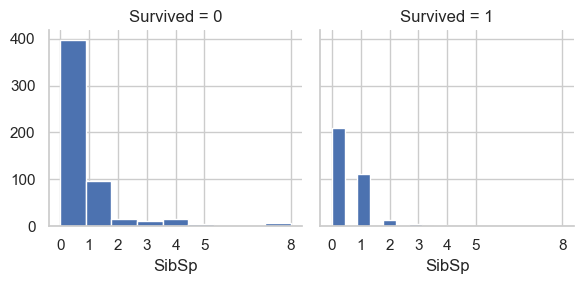

In [26]:
sibsp=sns.FacetGrid(df,col='Survived')
plt.xticks(SibSp_counts.index)
sibsp.map(plt.hist,'SibSp',bins=9)

#### visulize pclass is survived or not

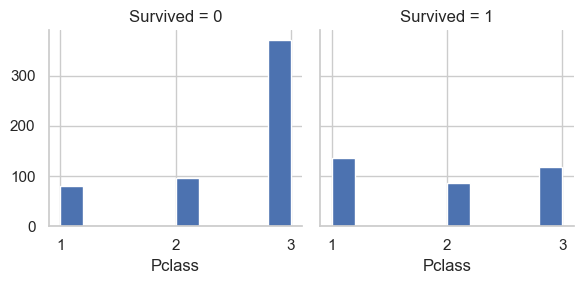

In [27]:
pclass=sns.FacetGrid(df,col='Survived')
plt.xticks([1,2,3])
pclass.map(plt.hist,'Pclass')

#### visulize Parch is survived or notParch

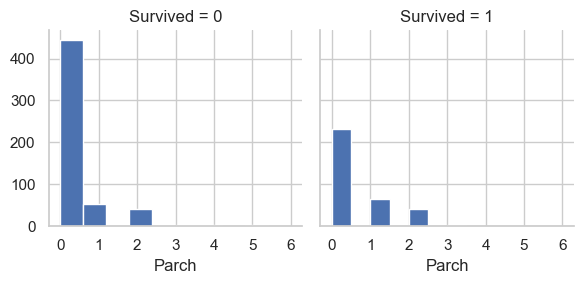

In [28]:
pclass=sns.FacetGrid(df,col='Survived')
plt.xticks(Parch_counts.index)
pclass.map(plt.hist,'Parch')

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Data cleaning: Convert 'Age' column to numeric, handling errors with coerce
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [31]:
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution')

Text(0.5, 1.0, 'Age Distribution')

In [32]:
# Drop rows with NaN values in the 'Age' column
df = df.dropna(subset=['Age'])

In [33]:
### convert the gender to binary 0 and 1
df['Sex']=df['Sex'].replace({'male':1,'female':0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# Fill missing values in age column by imputing the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [35]:
# Fill missing values in embarked column by imputing the mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [36]:
df['Embarked']=df['Embarked'].replace({'S':1,'C':2,'Q':3})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


In [37]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.029340,-0.035349,0.024575,0.036847,-0.082398,-0.011617,0.009592,-0.013696
Survived,0.029340,1.000000,-0.359653,-0.538826,-0.077221,-0.017358,0.093317,0.268189,0.106556
Pclass,-0.035349,-0.359653,1.000000,0.155460,-0.369226,0.067247,0.025683,-0.554182,-0.106056
Sex,0.024575,-0.538826,0.155460,1.000000,0.093254,-0.103950,-0.246972,-0.184994,-0.095006
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.010171
SibSp,-0.082398,-0.017358,0.067247,-0.103950,-0.308247,1.000000,0.383820,0.138329,0.004793
Parch,-0.011617,0.093317,0.025683,-0.246972,-0.189119,0.383820,1.000000,0.205119,-0.013361
Fare,0.009592,0.268189,-0.554182,-0.184994,0.096067,0.138329,0.205119,1.000000,0.175410
Embarked,-0.013696,0.106556,-0.106056,-0.095006,0.010171,0.004793,-0.013361,0.175410,1.000000


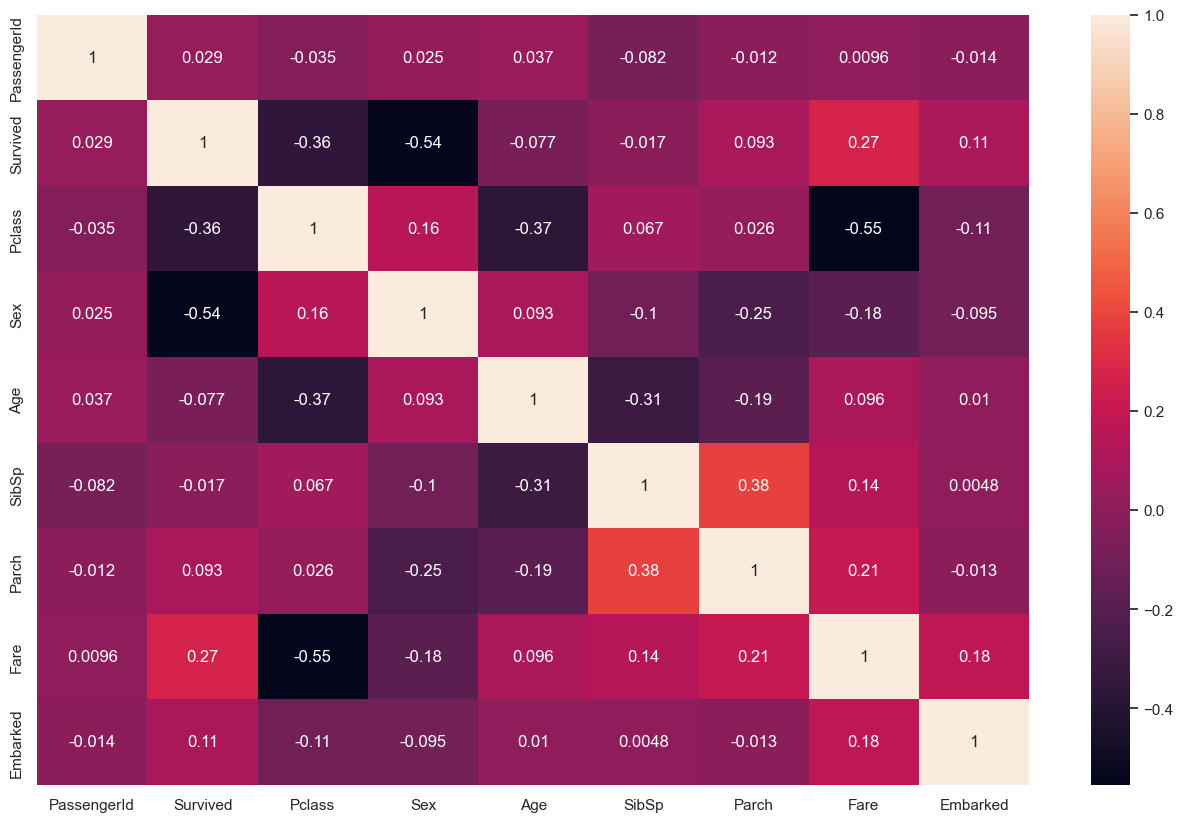

In [38]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [39]:
x=df.drop(['Name','Survived','Cabin','PassengerId','Ticket'],axis=1)
y=df['Survived']

In [40]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1


!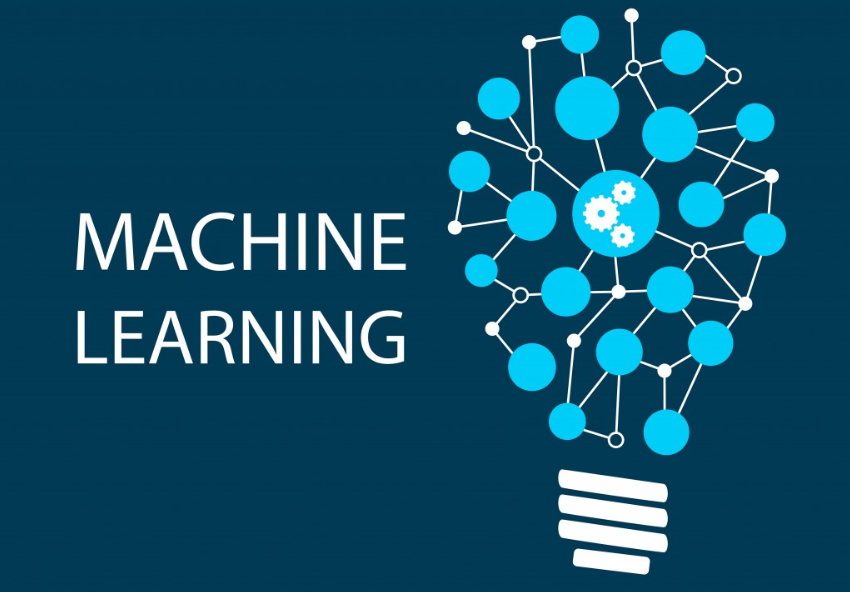

In [41]:
### Importing the dependencies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [42]:
### Machine Learning models Libraries: 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold,cross_val_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [44]:
print(x.shape,x_train.shape,x_test.shape)

(714, 7) (571, 7) (143, 7)


## Accuracy Score

In [45]:
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

In [46]:
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        y_predicted = model.predict(x_test)
        accuracy = accuracy_score(y_test,y_predicted)
        print("Accuracy of the ",model,"=",accuracy)
        print("="*100)

In [47]:
compare_models_train_test()

Accuracy of the  LogisticRegression(max_iter=1000) = 0.8111888111888111
Accuracy of the  DecisionTreeClassifier() = 0.7622377622377622
Accuracy of the  RandomForestClassifier() = 0.8251748251748252
Accuracy of the  KNeighborsClassifier() = 0.6993006993006993


## Cross Validation

In [48]:
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

In [49]:
def compare_models_cv():
    for model in models:
        cv_score =cross_val_score(model,x,y,cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy= mean_accuracy*100
        mean_accuracy = round(mean_accuracy,2) 
        print("cv_score of the",model,"=",cv_score)
        print("mean_accuracy % of the",model,"=",mean_accuracy,"%")
        print("="*100)

In [50]:
compare_models_cv()

cv_score of the LogisticRegression(max_iter=1000) = [0.75524476 0.81818182 0.78321678 0.76223776 0.82394366]
mean_accuracy % of the LogisticRegression(max_iter=1000) = 78.86 %
cv_score of the DecisionTreeClassifier() = [0.68531469 0.79020979 0.74825175 0.74125874 0.80985915]
mean_accuracy % of the DecisionTreeClassifier() = 75.5 %
cv_score of the RandomForestClassifier() = [0.72727273 0.81818182 0.82517483 0.77622378 0.86619718]
mean_accuracy % of the RandomForestClassifier() = 80.26 %
cv_score of the KNeighborsClassifier() = [0.58041958 0.66433566 0.68531469 0.67132867 0.75352113]
mean_accuracy % of the KNeighborsClassifier() = 67.1 %


## Conclusion :-
"Among the models evaluated, RandomForestClassifier exhibited the highest Cross-Validation (CV) score and Accuracy score for Titanic survival prediction. This suggests its superior performance in accurately predicting survival outcomes. RandomForestClassifier stands out as the most effective model for this task, offering robust predictive capabilities."